## HIPOTESIS 1: La tarifa punta coincide con la zona de mayor demanda, la tarifa valle con la de menor demanda y llano entre las dos tarifas ​

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
import seaborn as sns

In [ ]:
# Cargar datos
data = pd.read_csv("../Data/Demand_data.csv") 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918788 entries, 0 to 918787
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Hora        918788 non-null  object 
 1   Real        893596 non-null  float64
 2   Prevista    917290 non-null  float64
 3   Programada  918636 non-null  float64
dtypes: float64(3), object(1)
memory usage: 28.0+ MB


In [60]:
# Leer el CSV desde un string

data['Hora'] = pd.to_datetime(data['Hora'])

# Extraer hora en formato decimal y día de la semana
data['Hora_num'] = data['Hora'].dt.hour + data['Hora'].dt.minute / 60
data['Dia_semana'] = data['Hora'].dt.dayofweek  # Lunes=0, Domingo=6

# Clasificar en periodos
def clasificar_periodo(row):
    hora = row['Hora_num']
    dia = row['Dia_semana']
    
    if dia >= 5:  # Sábado o domingo
        return 'Valle'
    elif 0 <= hora < 8:
        return 'Valle'
    elif 10 <= hora < 14 or 18 <= hora < 22:
        return 'Punta'
    else:
        return 'Llano'

# Aplicar la clasificación
data['Periodo'] = data.apply(clasificar_periodo, axis=1)

# Mostrar resultados
print(data[['Hora', 'Real', 'Periodo']])

                      Hora    Real Periodo
0      2006-12-31 21:00:00  27.611   Valle
1      2006-12-31 21:10:00  27.355   Valle
2      2006-12-31 21:20:00  27.166   Valle
3      2006-12-31 21:30:00  26.848   Valle
4      2006-12-31 21:40:00  26.485   Valle
...                    ...     ...     ...
918783 2020-07-11 03:10:00     NaN   Valle
918784 2020-07-11 03:20:00     NaN   Valle
918785 2020-07-11 03:30:00     NaN   Valle
918786 2020-07-11 03:40:00     NaN   Valle
918787 2020-07-11 03:50:00     NaN   Valle

[918788 rows x 3 columns]


In [61]:
print(data.groupby('Periodo')['Real'].describe())

            count       mean       std     min     25%     50%     75%     max
Periodo                                                                       
Llano    211795.0  31.491081  3.194791  17.079  29.552  31.418  33.599  42.966
Punta    190620.0  33.546550  3.262421  18.887  31.544  33.487  35.619  45.295
Valle    491181.0  25.374780  3.214705  16.165  23.052  25.014  27.456  40.166


C:\Users\Alberto\AppData\Local\Temp\ipykernel_16876\486721913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Periodo', y='Real', data=data, order=['Valle', 'Llano', 'Punta'], palette='Set2')


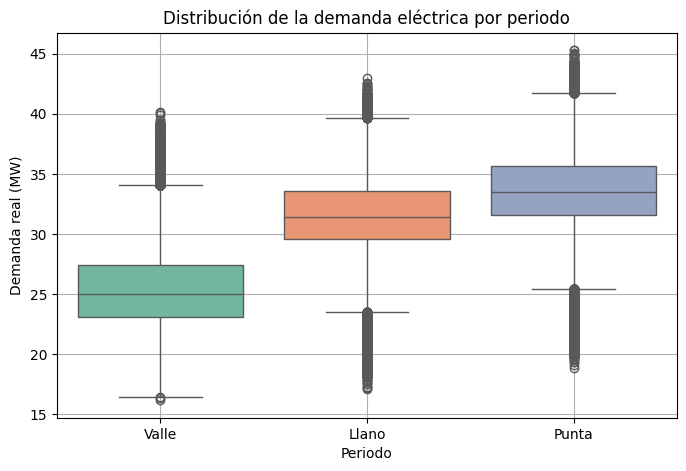

In [62]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Periodo', y='Real', data=data, order=['Valle', 'Llano', 'Punta'], palette='Set2')
plt.title('Distribución de la demanda eléctrica por periodo')
plt.xlabel('Periodo')
plt.ylabel('Demanda real (MW)')
plt.grid(True)
plt.show()

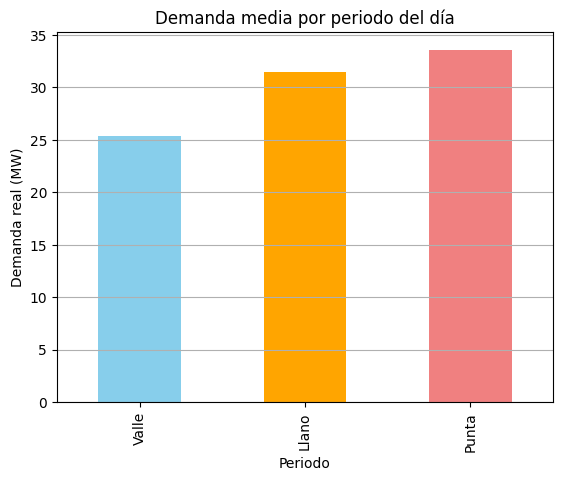

In [63]:
media_por_periodo = data.groupby('Periodo')['Real'].mean().loc[['Valle', 'Llano', 'Punta']]
media_por_periodo.plot(kind='bar', color=['skyblue', 'orange', 'lightcoral'])
plt.title('Demanda media por periodo del día')
plt.ylabel('Demanda real (MW)')
plt.grid(axis='y')
plt.show()

In [64]:
valle_media = media_por_periodo['Valle']
llano_media = media_por_periodo['Llano']
punta_media = media_por_periodo['Punta']

print("Demanda media en Valle:", valle_media)
print("Demanda media en Llano:", llano_media)
print("Demanda media en Punta:", punta_media)

if valle_media < llano_media < punta_media:
    print("✅ La hipótesis se cumple: Valle < Llano < Punta")
else:
    print("❌ La hipótesis no se cumple completamente")

Demanda media en Valle: 25.374780026100357
Demanda media en Llano: 31.491081078401283
Demanda media en Punta: 33.54655032000839
✅ La hipótesis se cumple: Valle < Llano < Punta


C:\Users\Alberto\AppData\Local\Temp\ipykernel_16876\1314704094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Periodo', y='Real', data=data, order=['Valle', 'Llano', 'Punta'], palette='Pastel2')


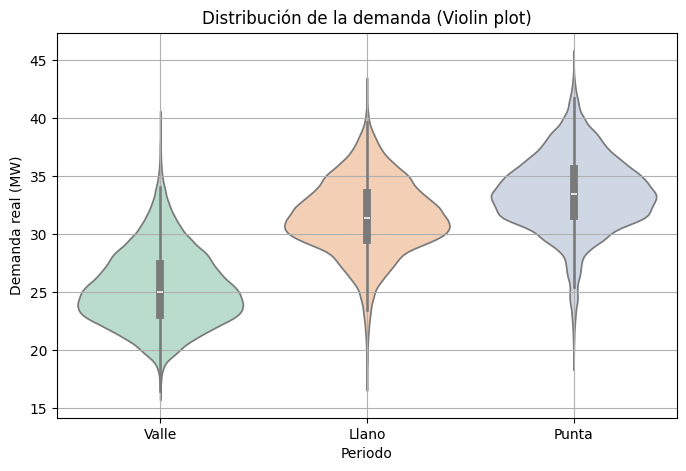

In [65]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Periodo', y='Real', data=data, order=['Valle', 'Llano', 'Punta'], palette='Pastel2')
plt.title('Distribución de la demanda (Violin plot)')
plt.xlabel('Periodo')
plt.ylabel('Demanda real (MW)')
plt.grid(True)
plt.show()

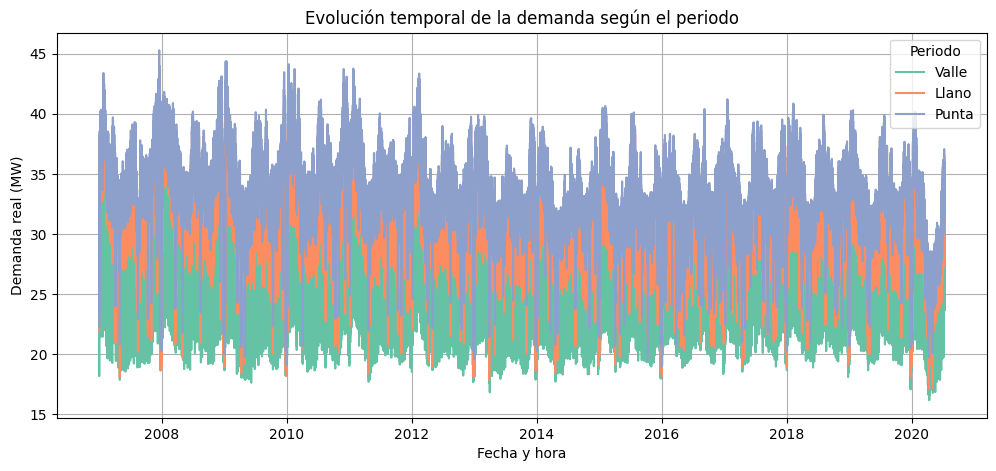

In [69]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='Hora', y='Real', data=data, hue='Periodo', palette='Set2', estimator=None)
plt.title('Evolución temporal de la demanda según el periodo')
plt.xlabel('Fecha y hora')
plt.ylabel('Demanda real (MW)')
plt.grid(True)
plt.show()

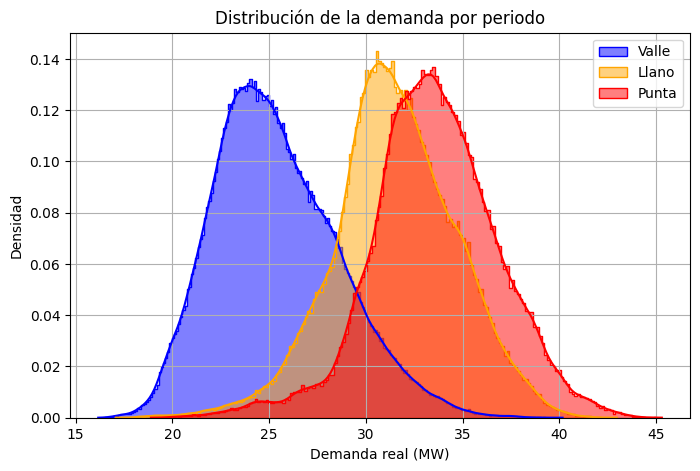

In [66]:
plt.figure(figsize=(8, 5))
for periodo, color in zip(['Valle', 'Llano', 'Punta'], ['blue', 'orange', 'red']):
    sns.histplot(data[data['Periodo'] == periodo]['Real'], kde=True, label=periodo, color=color, stat='density', element='step')

plt.title('Distribución de la demanda por periodo')
plt.xlabel('Demanda real (MW)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
# Codificación de los periodos
data['Periodo_cod'] = data['Periodo'].map({'Valle': 0, 'Llano': 1, 'Punta': 2})

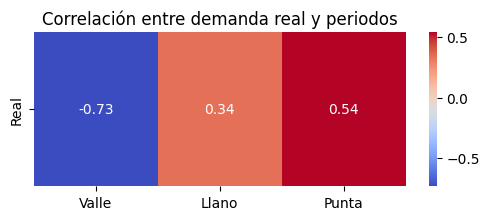

In [75]:
# Crear variables dummy para los periodos
period_dummies = pd.get_dummies(data['Periodo'])

# Concatenar con la columna 'Real'
corr_input = pd.concat([data['Real'], period_dummies], axis=1)

# Calcular la matriz de correlación
corr_matrix = corr_input.corr()

# Extraer solo la fila de 'Real' para ver su relación con cada periodo
corr_real = corr_matrix.loc[['Real'], ['Valle', 'Llano', 'Punta']]

# Graficar el mapa de calor
plt.figure(figsize=(6, 2))
sns.heatmap(corr_real, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre demanda real y periodos')
plt.show()

In [37]:
# Asegúrate de convertir 'Hora' a datetime
data['Hora'] = pd.to_datetime(data['Hora'], errors='coerce', format='%Y-%m-%d %H:%M')

# Verifica si hay valores nulos después de la conversión (indicador de error en el formato)
print(data['Hora'].isnull().sum())  # Debe ser 0

# Ahora sí: extraer hora decimal
data['Hora_num'] = data['Hora'].dt.hour + data['Hora'].dt.minute / 60
print(data.dtypes)

0
Hora          datetime64[ns]
Real                 float64
Prevista             float64
Programada           float64
Hora_num             float64
dtype: object


In [51]:
# Extraer hora decimal
data['Hora_num'] = data['Hora'].dt.hour + data['Hora'].dt.minute / 60

# Clasificar periodos
def clasificar_periodo(hora):
    if 0 <= hora < 8:
        return 'Valle'
    elif 10 <= hora < 14 or 18 <= hora <= 22:
        return 'Punta'
    else:
        return 'Llano'

data['Periodo'] = data['Hora_num'].apply(clasificar_periodo)

In [52]:
estadisticas = data.groupby('Periodo')['Real'].describe()
print(estadisticas)

            count       mean       std     min     25%     50%     75%     max
Periodo                                                                       
Llano    286515.0  30.080322  3.820157  16.165  27.524  30.250  32.676  42.966
Punta    276640.0  31.996356  3.991601  18.548  29.424  32.230  34.711  45.295
Valle    330441.0  24.385507  2.768726  16.430  22.489  24.086  25.999  40.166


KeyboardInterrupt: 

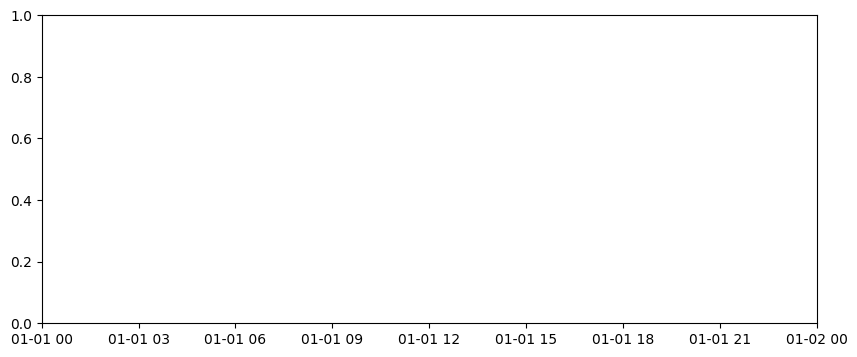

In [55]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='Hora', y='Real', data=data, hue='Periodo', palette='Set2', linewidth=2)
plt.title('Demanda eléctrica real a lo largo del tiempo')
plt.xlabel('Hora')
plt.ylabel('Demanda Real (GW)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Alberto\AppData\Local\Temp\ipykernel_16876\93240068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Periodo', y='Real', data=data, order=['Valle', 'Llano', 'Punta'], palette='Set2', inner='box')


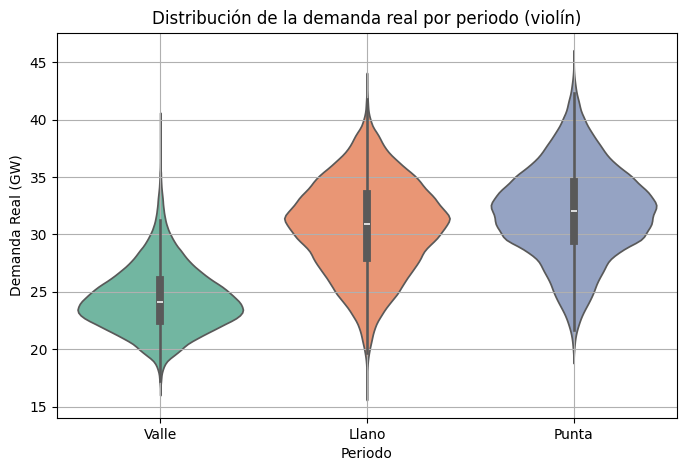

In [43]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Periodo', y='Real', data=data, order=['Valle', 'Llano', 'Punta'], palette='Set2', inner='box')
plt.title('Distribución de la demanda real por periodo (violín)')
plt.xlabel('Periodo')
plt.ylabel('Demanda Real (GW)')
plt.grid(True)
plt.show()

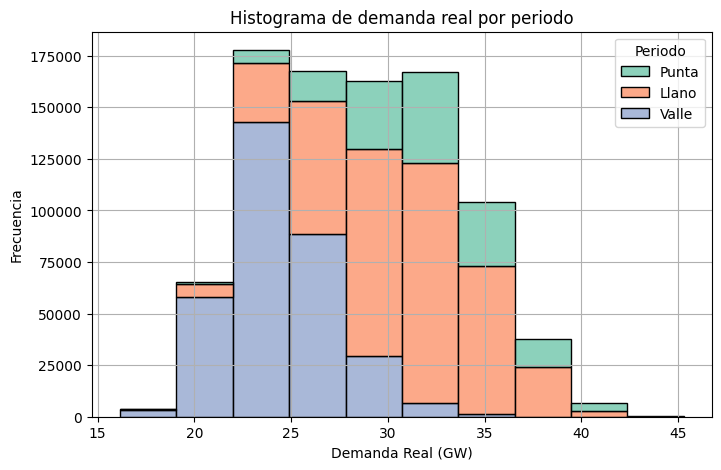

In [44]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Real', hue='Periodo', multiple='stack', palette='Set2', bins=10)
plt.title('Histograma de demanda real por periodo')
plt.xlabel('Demanda Real (GW)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

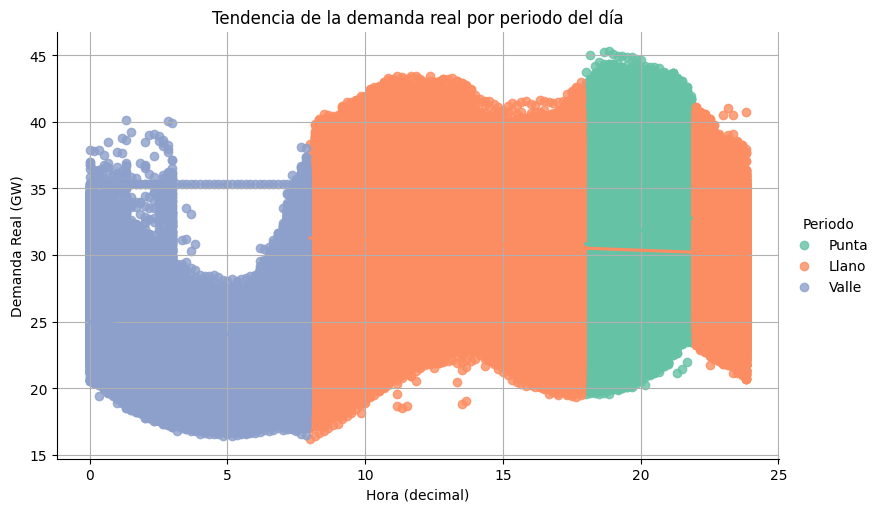

In [50]:
plt.figure(figsize=(10, 5))
sns.lmplot(x='Hora_num', y='Real', hue='Periodo', data=data, palette='Set2', height=5, aspect=1.6, ci=None)
plt.title('Tendencia de la demanda real por periodo del día')
plt.xlabel('Hora (decimal)')
plt.ylabel('Demanda Real (GW)')
plt.grid(True)
plt.show()

In [47]:
from scipy.stats import f_oneway, kruskal

# Extraer las series por grupo
valle = data[data['Periodo'] == 'Valle']['Real']
llano = data[data['Periodo'] == 'Llano']['Real']
punta = data[data['Periodo'] == 'Punta']['Real']

# ANOVA (supone normalidad y varianzas homogéneas)
anova_result = f_oneway(valle, llano, punta)

# Kruskal-Wallis (no paramétrico, más seguro en este caso)
kruskal_result = kruskal(valle, llano, punta)

print("ANOVA - F =", round(anova_result.statistic, 3), ", p =", round(anova_result.pvalue, 5))
print("Kruskal-Wallis - H =", round(kruskal_result.statistic, 3), ", p =", round(kruskal_result.pvalue, 5))

ANOVA - F = nan , p = nan
Kruskal-Wallis - H = nan , p = nan


Porcentaje de registros con alta demanda (>P75) por periodo:
Periodo
Valle     0.96
Llano    36.04
Punta    47.50
Name: Alta_Demanda, dtype: float64


C:\Users\Alberto\AppData\Local\Temp\ipykernel_16876\3685142808.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=altas_por_periodo.index, y=altas_por_periodo.values, palette='Set2')


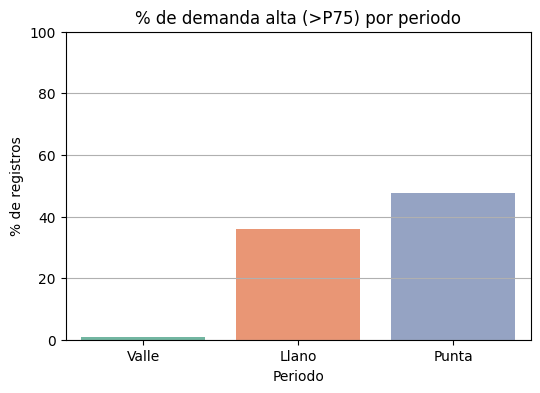

In [49]:
# Calcular percentil 75 de toda la demanda
p75 = data['Real'].quantile(0.75)

# Crear columna para saber si la demanda está por encima del p75
data['Alta_Demanda'] = data['Real'] > p75

# Calcular % de alta demanda por periodo
altas_por_periodo = data.groupby('Periodo')['Alta_Demanda'].mean() * 100
altas_por_periodo = altas_por_periodo.reindex(['Valle', 'Llano', 'Punta'])

# Mostrar resultados
print("Porcentaje de registros con alta demanda (>P75) por periodo:")
print(altas_por_periodo.round(2))

# Gráfico
plt.figure(figsize=(6, 4))
sns.barplot(x=altas_por_periodo.index, y=altas_por_periodo.values, palette='Set2')
plt.title('% de demanda alta (>P75) por periodo')
plt.ylabel('% de registros')
plt.xlabel('Periodo')
plt.ylim(0, 100)
plt.grid(True, axis='y')
plt.show()